# Data mining Project

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import time

# Third-Party Libraries
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from memory_profiler import memory_usage
from pymining import itemmining, assocrules
import pandas as pd
from itertools import combinations
from mlxtend.frequent_patterns import apriori, association_rules 
import numpy as np
import pandas as pd
from itertools import combinations

# Ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Converting .txt to .csv

In [3]:
import pandas as pd

# Read the data from the file
file_path = 'data.txt'
df = pd.read_csv(file_path, delimiter='\t', header=None)

# Assign column names to the DataFrame
columns = [
    "ID", "Gender", "Age_Group", "Residence", "Education_Level", "Source_of_Income",
    "Marital_Status", "Smoked_Cigarettes", "Year_Diagnosed", "Surgical_Treatment",
    "Chemotherapy", "Radiotherapy", "Immunotherapy", "Molecular_targeted_Therapy",
    "Hospitalization_Number", "Time_to_Treatment", "Medical_Treatment_Need",
    "Emotional_Impact", "Travel_Impact", "Quality_of_Life", "Symptoms_exp_cough",
    "Symptoms_exp_Hoarseness", "Symptoms_exp_Blood_cough", "Symptoms_exp_chestpain",
    "Symptoms_exp_Shortness_of_breath", "Symptoms_exp_weakness", "Symptoms_exp_None",
    "Symptom_Frequency", "Symptom_Household_Impact", "Sleep_Issues", "Support_From_Close",
    "Dependency_Fear", "Health_Satisfaction", "Daily_Life_Impact_physical", "Daily_Life_Impact_Psychological",
    "Daily_Life_Impact_proffesional", "Daily_Life_Impact_family_life", "Daily_Life_Impact_social_life",
    "Daily_Life_Impact_no_effect", "Energy_Level", "Self_Care", "Daily_Activities_Difficulty",
    "Work_Readiness", "Support_Satisfaction", "Coping_Strategy", "Negative_Emotions"
]
df.columns = columns

# List of single-choice categorical variables to be one-hot encoded
single_choice_vars = [
    'Gender', 'Age_Group', 'Residence', 'Education_Level', 'Source_of_Income', 'Marital_Status',
    'Hospitalization_Number', 'Time_to_Treatment', 'Medical_Treatment_Need', 'Quality_of_Life',
    'Symptom_Frequency', 'Symptom_Household_Impact', 'Sleep_Issues', 'Dependency_Fear',
    'Energy_Level', 'Self_Care', 'Daily_Activities_Difficulty', 'Work_Readiness',
    'Support_Satisfaction', 'Coping_Strategy', 'Negative_Emotions'
]

# Mapping of variables to their options for meaningful labels
options_dict = {
    'Gender': {1: 'Female', 2: 'Male', 3: 'Nonbinary', 4: 'Prefer_not_to_say'},
    'Age_Group': {1: 'Below_30', 2: '30_45', 3: '46_60', 4: 'Above_60'},
    'Residence': {1: 'Village', 2: 'Town_upto_100k', 3: 'Town_100k_500k', 4: 'City_over_500k'},
    'Education_Level': {1: 'Primary', 2: 'Vocational', 3: 'Secondary', 4: 'Higher'},
    'Source_of_Income': {1: 'Employment', 2: 'Pension', 3: 'Retirement', 4: 'Other'},
    'Marital_Status': {1: 'Single', 2: 'Married', 3: 'Divorced', 4: 'Widowed'},
    'Hospitalization_Number': {1: 'Zero', 2: 'One_to_three', 3: 'Three_to_five', 4: 'Above_five'},
    'Time_to_Treatment': {1: 'Up_to_one_month', 2: 'One_to_three_months', 3: 'More_than_three_months'},
    'Medical_Treatment_Need': {1: 'Not_at_all', 2: 'Moderately', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Quality_of_Life': {1: 'Very_good', 2: 'Good', 3: 'Bad', 4: 'Very_bad'},
    'Symptom_Frequency': {1: 'Did_not_occur', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Symptom_Household_Impact': {1: 'Do_not_affect', 2: 'Rarely_affect', 3: 'Often_affect', 4: 'Always_affect'},
    'Sleep_Issues': {1: 'Not_once', 2: 'Rather_rarely', 3: 'Most_of_time', 4: 'All_the_time'},
    'Dependency_Fear': {1: 'Not_afraid', 2: 'Minimally', 3: 'Large_extent', 4: 'Very_large_extent'},
    'Energy_Level': {1: 'Fully', 2: 'Mostly', 3: 'Very_little', 4: 'Not_at_all'},
    'Self_Care': {1: 'No_problems', 2: 'Minor_problems', 3: 'Serious_problems', 4: 'Cannot_perform'},
    'Daily_Activities_Difficulty': {1: 'No_problems', 2: 'Minor_problems', 3: 'Moderate_problems', 4: 'Serious_problems', 5: 'Unable_to_perform'},
    'Work_Readiness': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Support_Satisfaction': {1: 'Satisfied', 2: 'Moderately_satisfied', 3: 'Dissatisfied'},
    'Coping_Strategy': {1: 'Well', 2: 'Hard_to_say', 3: 'Badly'},
    'Negative_Emotions': {1: 'Never', 2: 'Rarely', 3: 'Often', 4: 'All_the_time'}
}

# Map numerical codes to meaningful labels
for var in single_choice_vars:
    if var in options_dict:
        df[var] = df[var].map(options_dict[var])

# One-hot encode the single-choice categorical variables
df = pd.get_dummies(df, columns=single_choice_vars)

# Save the processed data to a CSV file
df.to_csv('processed_survey_data_columns.csv', index=False)

# Display the first few rows of the processed DataFrame
print(df.head())


   ID  Smoked_Cigarettes  Year_Diagnosed  Surgical_Treatment  Chemotherapy  \
0   1                  1            2021                   0             1   
1   2                  1            2020                   1             1   
2   3                  1            2020                   1             0   
3   4                  1            2021                   1             1   
4   5                  1            2019                   1             1   

   Radiotherapy  Immunotherapy  Molecular_targeted_Therapy  Emotional_Impact  \
0             0              1                           0                 1   
1             0              0                           0                 1   
2             0              0                           0                 1   
3             0              0                           0                 1   
4             0              0                           0                 1   

   Travel_Impact  ...  Support_Satisfaction_Dissat

# Data cleaning

In [4]:
df.shape

(300, 103)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 103 entries, ID to Negative_Emotions_Rarely
dtypes: bool(78), int64(25)
memory usage: 81.6 KB


In [6]:
# 1. Remove duplicate rows
df = df.drop_duplicates()
print(f"\nData after removing duplicates: {df.shape}")

# 2. Handle missing values
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Fill missing categorical values with mode
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
print(f"\nData after handling missing values:\n{df.isnull().sum()}")

# 3. Drop irrelevant or redundant columns  
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])

# 4. Standardize column names  
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]


Data after removing duplicates: (300, 103)

Data after handling missing values:
ID                                0
Smoked_Cigarettes                 0
Year_Diagnosed                    0
Surgical_Treatment                0
Chemotherapy                      0
                                 ..
Coping_Strategy_Well              0
Negative_Emotions_All_the_time    0
Negative_Emotions_Never           0
Negative_Emotions_Often           0
Negative_Emotions_Rarely          0
Length: 103, dtype: int64


**All columns are integer value, numerical columns. But we have categorical columns in them like Gender, Marital Status, Smoked cigaretes, Chemoheraphy etc. ( some are binary, some are multiclass)**

In [7]:
import pandas as pd

 
df = pd.read_csv('processed_survey_data_columns.csv')

 
columns_to_exclude = ['ID', 'Year_Diagnosed']
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Convert all non-zero values to 1 (binary)
df_for_itemsets = df_for_itemsets.applymap(lambda x: 1 if x != 0 else 0)

 
transactions = []
 
for index, row in df_for_itemsets.iterrows():
    # Extract the column names where the value is 1
    itemset = row[row == 1].index.tolist()
    transactions.append(itemset)

# Display the first 5 transactions
for i, transaction in enumerate(transactions[:5]):
    print(f"Transaction {i+1}: {transaction}")


Transaction 1: ['Smoked_Cigarettes', 'Chemotherapy', 'Immunotherapy', 'Emotional_Impact', 'Travel_Impact', 'Symptoms_exp_cough', 'Symptoms_exp_Shortness_of_breath', 'Support_From_Close', 'Daily_Life_Impact_Psychological', 'Gender_Female', 'Age_Group_Below_30', 'Residence_Town_upto_100k', 'Education_Level_Higher', 'Source_of_Income_Employment', 'Marital_Status_Single', 'Hospitalization_Number_Three_to_five', 'Time_to_Treatment_One_to_three_months', 'Medical_Treatment_Need_Large_extent', 'Quality_of_Life_Good', 'Symptom_Frequency_Most_of_time', 'Symptom_Household_Impact_Often_affect', 'Sleep_Issues_Most_of_time', 'Dependency_Fear_Large_extent', 'Energy_Level_Mostly', 'Self_Care_No_problems', 'Daily_Activities_Difficulty_No_problems', 'Work_Readiness_Moderately_satisfied', 'Support_Satisfaction_Moderately_satisfied', 'Coping_Strategy_Badly', 'Negative_Emotions_Often']
Transaction 2: ['Smoked_Cigarettes', 'Surgical_Treatment', 'Chemotherapy', 'Emotional_Impact', 'Travel_Impact', 'Symptoms_

C:\Users\harri\AppData\Local\Temp\ipykernel_6072\1842176657.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_for_itemsets = df_for_itemsets.applymap(lambda x: 1 if x != 0 else 0)


In [8]:
import mlxtend
print("mlxtend version:", mlxtend.__version__)


mlxtend version: 0.23.3


## Matrix apriori

In [9]:
def matrix_apriori(data, min_support):
    """
    Matrix-based Apriori Algorithm to find frequent itemsets in a transaction dataset.
    Supports output as percentages.

    Parameters:
    - data (pandas DataFrame): Transactional dataset where each row represents a transaction
      and each column represents an item (1 if item is bought, 0 if not).
    - min_support (float): The minimum support threshold (between 0 and 1). Default is 0.01.

    Returns:
    - frequent_itemsets (list): A list of frequent itemsets that meet the minimum support threshold,
      with their support as percentages.
    """
    
    # Convert the DataFrame to a NumPy array for matrix operations
    matrix = data.to_numpy()

    # Step 1: Get frequent 1-itemsets (single items)
    n_transactions = matrix.shape[0]
    item_counts = matrix.sum(axis=0)  # Count occurrences of each item
    item_support = item_counts / n_transactions  # Calculate support for each item

    # Step 2: Filter items based on min_support
    frequent_1_itemsets = {i: item_support[i] for i in range(len(item_support)) if item_support[i] >= min_support}
    
    # Step 3: Generate frequent itemsets (combinations of 2 or more items)
    frequent_itemsets = [{i} for i in frequent_1_itemsets.keys()]  # Start with 1-itemsets as sets, not integers
    k = 2  # Start with 2-itemsets
    
    while True:
        # Generate candidate itemsets of length k
        candidate_itemsets = generate_candidates(frequent_itemsets, k)
        
        # Calculate support for candidate itemsets using matrix multiplication
        candidate_support = calculate_support(matrix, candidate_itemsets)
        
        # Prune infrequent itemsets based on min_support
        frequent_itemsets_k = [itemset for itemset, support in candidate_support.items() if support >= min_support]
        
        if not frequent_itemsets_k:
            break
        
        # Add frequent itemsets of length k to the final list
        frequent_itemsets.extend(frequent_itemsets_k)
        
        k += 1
    
    # Convert the frequent itemsets back to a human-readable format (item names)
    item_names = list(data.columns)
    frequent_itemsets_names = []
    frequent_itemsets_with_percent = []
    
    for itemset in frequent_itemsets:
        itemset_name = set(item_names[i] for i in itemset)
        support_percentage = calculate_support_percentage(matrix, itemset)
        frequent_itemsets_names.append(itemset_name)
        frequent_itemsets_with_percent.append((itemset_name, support_percentage))
    
    return frequent_itemsets_with_percent


def generate_candidates(frequent_itemsets, k):
    """
    Generate candidate itemsets of size k from frequent itemsets of size (k-1).

    Parameters:
    - frequent_itemsets (list): A list of frequent itemsets from previous iteration.
    - k (int): The size of the itemsets to generate.

    Returns:
    - candidates (list): A list of candidate itemsets of size k.
    """
    candidates = []
    for itemset1, itemset2 in combinations(frequent_itemsets, 2):
        candidate = itemset1.union(itemset2)
        if len(candidate) == k and candidate not in candidates:
            candidates.append(candidate)
    
    return candidates


def calculate_support(matrix, candidates):
    """
    Calculate the support of candidate itemsets using matrix multiplication.

    Parameters:
    - matrix (numpy.ndarray): The binary transaction matrix.
    - candidates (list): A list of candidate itemsets.

    Returns:
    - support (dict): A dictionary where keys are itemsets and values are their support.
    """
    support = {}
    for candidate in candidates:
        # Create a mask for the candidate itemset (check if all items in the candidate are 1 for each transaction)
        mask = np.all(matrix[:, list(candidate)] == 1, axis=1)
        
        # Calculate support as the fraction of transactions containing the itemset
        support[frozenset(candidate)] = mask.sum() / matrix.shape[0]
    
    return support


def calculate_support_percentage(matrix, itemset):
    """
    Calculate the support percentage of a given itemset.

    Parameters:
    - matrix (numpy.ndarray): The binary transaction matrix.
    - itemset (set): A set representing the itemset to calculate support for.

    Returns:
    - percentage (float): The support percentage of the itemset.
    """
    mask = np.all(matrix[:, list(itemset)] == 1, axis=1)
    support_percentage = (mask.sum() / matrix.shape[0]) * 100
    return support_percentage


In [10]:
def Matrix_Apriori_all():
    """
    Wrapper function to run Matrix Apriori and store the results.
    """
    matrix_apriori_results = matrix_apriori(df_for_itemsets, min_support=0.4)
    return matrix_apriori_results

if __name__ == "__main__":
    start_time = time.time()

    # Measure memory usage
    mem_usage, matrix_apriori_results = memory_usage(Matrix_Apriori_all, retval=True)

    end_time = time.time()
    elapsed_time_matrix_apriori = end_time - start_time

    matrix_apriori_mem_usage = max(mem_usage)

    # Print results
    print(f"Matrix Apriori Execution Time: {elapsed_time_matrix_apriori:.2f} seconds")
    print(f"Matrix Apriori Peak Memory Usage: {matrix_apriori_mem_usage:.2f} MiB")

    # Display results
    for itemset, support in matrix_apriori_results:
        print(f"Itemset: {itemset}, Support: {support:.2f}%")





Matrix Apriori Execution Time: 0.90 seconds
Matrix Apriori Peak Memory Usage: 194.35 MiB
Itemset: {'Smoked_Cigarettes'}, Support: 62.67%
Itemset: {'Chemotherapy'}, Support: 58.67%
Itemset: {'Emotional_Impact'}, Support: 86.33%
Itemset: {'Travel_Impact'}, Support: 68.00%
Itemset: {'Support_From_Close'}, Support: 90.33%
Itemset: {'Health_Satisfaction'}, Support: 70.00%
Itemset: {'Daily_Life_Impact_Psychological'}, Support: 54.67%
Itemset: {'Gender_Female'}, Support: 54.00%
Itemset: {'Gender_Male'}, Support: 46.00%
Itemset: {'Source_of_Income_Employment'}, Support: 58.00%
Itemset: {'Marital_Status_Married'}, Support: 53.33%
Itemset: {'Hospitalization_Number_One_to_three'}, Support: 44.00%
Itemset: {'Time_to_Treatment_One_to_three_months'}, Support: 49.33%
Itemset: {'Quality_of_Life_Bad'}, Support: 41.00%
Itemset: {'Symptom_Frequency_Most_of_time'}, Support: 41.33%
Itemset: {'Sleep_Issues_Rather_rarely'}, Support: 43.67%
Itemset: {'Self_Care_No_problems'}, Support: 61.67%
Itemset: {'Work_R

## Apriori

In [11]:
# Load the data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

 
#Running Apriori for all, one-hot encoded data which has 131 variables generated after encoding.
apriori_all=pd.DataFrame()
apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)

print("Apriori Results for all columns:")
print(apriori_all) 

c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Apriori Results for all columns:
       support                                           itemsets
9     0.903333                               (Support_From_Close)
4     0.863333                                 (Emotional_Impact)
159   0.810000             (Support_From_Close, Emotional_Impact)
59    0.776667                   (Support_Satisfaction_Satisfied)
292   0.776667  (Support_Satisfaction_Satisfied, Support_From_...
...        ...                                                ...
7221  0.200000  (Travel_Impact, Health_Satisfaction, Negative_...
7234  0.200000  (Travel_Impact, Health_Satisfaction, Work_Read...
4619  0.200000  (Support_From_Close, Symptom_Household_Impact_...
4615  0.200000  (Support_Satisfaction_Satisfied, Marital_Statu...
8404  0.200000  (Travel_Impact, Support_From_Close, Coping_Str...

[9720 rows x 2 columns]


In [12]:
def Apriori_all():
    apriori_all=pd.DataFrame()
    apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)

if __name__ == "__main__":
    start_time = time.time()

    # Measure memory usage
    mem_usage, _ = memory_usage(Apriori_all, retval=True)

    end_time = time.time()
    elapsed_time_apriori = end_time - start_time

    apr_mem_usage = max(mem_usage)


c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


## Fp growth algorithm

In [13]:
# Load the data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

# Prepare transactions
transactions = []
for index, row in df_for_itemsets.iterrows():
    # Get the features where the value is 1
    itemset = row[row == 1].index.tolist()
    transactions.append(itemset)


def run_fp_growth():
    
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)
    return fpgrowth(df_fpgrowth, min_support= 0.2, use_colnames=True)

 
memory_usage_fp = memory_usage(run_fp_growth, interval=0.1)   

peak_memory_fp = max(memory_usage_fp)

print(f"Peak Memory Usage for FP-Growth: {peak_memory_fp:.2f} MiB")

start_time = time.time()
fp_frequent_itemsets = run_fp_growth()
end_time = time.time()

fp_growth_execution_time = end_time - start_time

print(f"Execution Time for FP-Growth: {fp_growth_execution_time:.2f} seconds")
print("Frequent Itemsets:")
print(fp_frequent_itemsets.sort_values(by='support', ascending=False))

Peak Memory Usage for FP-Growth: 210.34 MiB
Execution Time for FP-Growth: 4.49 seconds
Frequent Itemsets:
       support                                           itemsets
0     0.903333                               (Support_From_Close)
1     0.863333                                 (Emotional_Impact)
65    0.810000             (Support_From_Close, Emotional_Impact)
33    0.776667                   (Support_Satisfaction_Satisfied)
6811  0.776667  (Support_Satisfaction_Satisfied, Support_From_...
...        ...                                                ...
2990  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2992  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2993  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2994  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
9719  0.200000  (Symptoms_exp_None, Symptom_Frequency_Did_not_...

[9720 rows x 2 columns]


## Lowest ST, highest number of items 

In [14]:
print("Frequent Itemsets:") 

for i in fp_frequent_itemsets[-1:]["itemsets"]:
    print(i)

Frequent Itemsets:
frozenset({'Symptoms_exp_None', 'Symptom_Frequency_Did_not_occur', 'Coping_Strategy_Well', 'Self_Care_No_problems', 'Symptom_Household_Impact_Do_not_affect'})


# Relim

In [15]:
#!pip install pymining
from pymining import itemmining

In [16]:
 
def run_relim():
    trans_sets = [set(transaction) for transaction in transactions]
    relim_input = itemmining.get_relim_input(trans_sets)
    total_transactions = len(transactions)
    min_support_ratio = 0.2
    min_support = max(1, int(min_support_ratio * total_transactions))
    start_time = time.time()
    # Relim
    relim_itemsets = itemmining.relim(relim_input, min_support=min_support)
    # End the timer
    end_time = time.time()
    # Calculate execution time
    relim_execution_time = end_time - start_time
    print("Frequent Itemsets:")
    for itemset, support in relim_itemsets.items():
        itemset_str = ', '.join(itemset)
        print(f"Itemset: {{{itemset_str}}}, Support: {support}")
    return relim_itemsets, relim_execution_time

# Measure memory usage
mem_usage, (relim_itemsets, relim_execution_time) = memory_usage(run_relim, retval=True)

# Get peak memory usage
peak_mem_relim = max(mem_usage)
print(f"Peak memory usage: {peak_mem_relim} MiB")


Frequent Itemsets:
Itemset: {Self_Care_Minor_problems}, Support: 60
Itemset: {Self_Care_Minor_problems, Emotional_Impact}, Support: 60
Itemset: {Symptom_Frequency_Did_not_occur}, Support: 61
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Symptom_Household_Impact_Do_not_affect}, Support: 60
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Symptom_Household_Impact_Do_not_affect, Coping_Strategy_Well}, Support: 60
Itemset: {Self_Care_No_problems, Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Symptom_Household_Impact_Do_not_affect, Coping_Strategy_Well}, Support: 60
Itemset: {Symptoms_exp_None, Self_Care_No_problems, Symptom_Household_Impact_Do_not_affect, Symptom_Frequency_Did_not_occur}, Support: 60
Itemset: {Symptoms_exp_None, Symptom_Frequency_Did_not_occur, Coping_Strategy_Well}, Support: 60
Itemset: {Symptoms_exp_None, Self_Care_No_problems, Coping_Strategy_Well, Symptom_Frequ

# ECLAT

In [17]:
def eclat(df, min_support):
    
    def get_support(itemset):
        # Support is the number of transactions containing all items in the itemset
        return df.loc[df[list(itemset)].all(axis=1)].shape[0]

    num_transactions = len(df)
    min_support_count = min_support * num_transactions

    # Generate initial itemsets (1-itemsets)
    itemsets = {frozenset([item]): get_support([item]) for item in df.columns}

    # Filter out itemsets that don't meet the minimum support threshold
    itemsets = {k: v for k, v in itemsets.items() if v >= min_support_count}

    # Recursive step to generate larger itemsets
    def generate_candidates(current_itemsets):
        candidates = []
        current_items = list(current_itemsets.keys())
        for i in range(len(current_items)):
            for j in range(i + 1, len(current_items)):
                candidate = current_items[i] | current_items[j]
                if len(candidate) == len(current_items[i]) + 1:  # Ensure only 1-item difference
                    candidates.append(candidate)
        return candidates

    all_frequent_itemsets = itemsets.copy()
    current_itemsets = itemsets

    while current_itemsets:
        candidates = generate_candidates(current_itemsets)
        current_itemsets = {c: get_support(c) for c in candidates if get_support(c) >= min_support_count}
        all_frequent_itemsets.update(current_itemsets)

    # Convert support counts to support as a fraction
    all_frequent_itemsets = {k: v / num_transactions for k, v in all_frequent_itemsets.items()}

    return all_frequent_itemsets

# Load data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

min_support = 0.2  # Minimum support threshold

# Memory and execution time profiling
def profile_eclat():
    start_time = time.time()
    frequent_itemsets = eclat(df_for_itemsets, min_support=min_support)
    end_time = time.time()
    return frequent_itemsets, end_time - start_time

# Capture peak memory usage and run the algorithm
peak_memory_usage = memory_usage((profile_eclat, ), max_usage=True, retval=True)
eclat_frequent_itemsets, eclat_execution_time = peak_memory_usage[1]
eclat_peak_memory = peak_memory_usage[0]

for itemset, support in eclat_frequent_itemsets.items():
    print(f"Itemset: {set(itemset)}, Support: {support:.2f}")


Itemset: {'Smoked_Cigarettes'}, Support: 0.63
Itemset: {'Surgical_Treatment'}, Support: 0.39
Itemset: {'Chemotherapy'}, Support: 0.59
Itemset: {'Radiotherapy'}, Support: 0.37
Itemset: {'Emotional_Impact'}, Support: 0.86
Itemset: {'Travel_Impact'}, Support: 0.68
Itemset: {'Symptoms_exp_cough'}, Support: 0.22
Itemset: {'Symptoms_exp_weakness'}, Support: 0.24
Itemset: {'Symptoms_exp_None'}, Support: 0.20
Itemset: {'Support_From_Close'}, Support: 0.90
Itemset: {'Health_Satisfaction'}, Support: 0.70
Itemset: {'Daily_Life_Impact_physical'}, Support: 0.29
Itemset: {'Daily_Life_Impact_Psychological'}, Support: 0.55
Itemset: {'Gender_Female'}, Support: 0.54
Itemset: {'Gender_Male'}, Support: 0.46
Itemset: {'Age_Group_30_45'}, Support: 0.29
Itemset: {'Age_Group_46_60'}, Support: 0.31
Itemset: {'Age_Group_Above_60'}, Support: 0.28
Itemset: {'Residence_Town_100k_500k'}, Support: 0.37
Itemset: {'Residence_Town_upto_100k'}, Support: 0.30
Itemset: {'Education_Level_Higher'}, Support: 0.26
Itemset: {'

# Comparing the algorithms

In [18]:
fp_frequent_itemsets # itermsets genenrated by fpgrowth
relim_itemsets # itemsets generated by relim

{frozenset({'Self_Care_Minor_problems'}): 60,
 frozenset({'Emotional_Impact', 'Self_Care_Minor_problems'}): 60,
 frozenset({'Symptom_Frequency_Did_not_occur'}): 61,
 frozenset({'Symptom_Frequency_Did_not_occur', 'Symptoms_exp_None'}): 60,
 frozenset({'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Self_Care_No_problems',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Self_Care_No_problems',
            'Symptom_Frequency_Did_not_occur',
            'Symptom_Household_Impact_Do_not_affect',
            'Symptoms_exp_None'}): 60,
 frozenset({'Coping_Strategy_Well',
            'Sympto

### Time

In [19]:
print("execution time for fpgrowth",fp_growth_execution_time)
print("execution time for relim", relim_execution_time)
print("execution time for eclat", eclat_execution_time)
print("execution time for apriori", elapsed_time_apriori)
print("execution time for matrix apriori", elapsed_time_matrix_apriori)

execution time for fpgrowth 4.492168664932251
execution time for relim 0.3108937740325928
execution time for eclat 139.60697650909424
execution time for apriori 1.1318244934082031
execution time for matrix apriori 0.8967339992523193


### Memory usage

In [20]:
print("peak memory usage for fpgrowth", peak_memory_fp)
print("peak memory usage for relim", peak_mem_relim)   
print("peak memory usage for eclat", eclat_peak_memory)
print("peak memory usage for apriori", apr_mem_usage)
print("peak memory usage for matrix apriori", matrix_apriori_mem_usage)

peak memory usage for fpgrowth 210.3359375
peak memory usage for relim 213.19140625
peak memory usage for eclat 297.5625
peak memory usage for apriori 376.73828125
peak memory usage for matrix apriori 194.34765625


### Frequent itemset generation

In [21]:
num_itemsets_fp_growth = len(fp_frequent_itemsets)
num_itemsets_relim = len(relim_itemsets)
num_itemsets_eclat = len(eclat_frequent_itemsets)
num_itemsets_apriori = len(apriori_all)
num_itemsets_matrix_apriori = len(matrix_apriori_results)

print("Number of itemsets generated by FP-Growth:", num_itemsets_fp_growth)
print("Number of itemsets generated by Relim:", num_itemsets_relim)
print("Number of itemsets generated by ECLAT:", num_itemsets_eclat)
print("Number of itemsets generated by Apriori:", num_itemsets_apriori)

Number of itemsets generated by FP-Growth: 9720
Number of itemsets generated by Relim: 9720
Number of itemsets generated by ECLAT: 9720
Number of itemsets generated by Apriori: 9720


###  Itemset Sizes (Lengths) Comparison

In [22]:
 

matrix_apriori_results_df = pd.DataFrame(matrix_apriori_results, columns=['itemsets', 'support'])

print(matrix_apriori_results_df)


                                              itemsets    support
0                                  {Smoked_Cigarettes}  62.666667
1                                       {Chemotherapy}  58.666667
2                                   {Emotional_Impact}  86.333333
3                                      {Travel_Impact}  68.000000
4                                 {Support_From_Close}  90.333333
..                                                 ...        ...
297  {Support_Satisfaction_Satisfied, Travel_Impact...  43.333333
298  {Support_Satisfaction_Satisfied, Support_From_...  42.000000
299  {Travel_Impact, Health_Satisfaction, Support_F...  45.333333
300  {Support_Satisfaction_Satisfied, Travel_Impact...  43.000000
301  {Support_Satisfaction_Satisfied, Health_Satisf...  41.666667

[302 rows x 2 columns]


In [23]:
from collections import Counter

 
fp_growth_lengths = Counter([len(itemset) for itemset in fp_frequent_itemsets['itemsets']])
 
relim_lengths = Counter([len(itemset) for itemset in relim_itemsets.keys()])

eclat_lengths = Counter([len(itemset) for itemset in eclat_frequent_itemsets.keys()])

apriori_lengths = Counter([len(itemset) for itemset in apriori_all['itemsets']])

matrix_apriori_lengths = Counter([len(itemset) for itemset in matrix_apriori_results_df['itemsets']])

# Display the counts of itemsets by length
print("Lengths of frequent itemsets generated by FP-Growth:", fp_growth_lengths)
print("Lengths of frequent itemsets generated by RElim:", relim_lengths)
print("Lengths of frequent itemsets generated by ECLAT:", eclat_lengths)
print("Lengths of frequent itemsets generated by Apriori:", apriori_lengths)
print("Lengths of frequent itemsets generated by Matrix Apriori:", matrix_apriori_lengths)

Lengths of frequent itemsets generated by FP-Growth: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by RElim: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by ECLAT: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by Apriori: Counter({4: 2732, 5: 2537, 3: 1696, 6: 1481, 7: 550, 2: 532, 8: 117, 1: 65, 9: 10})
Lengths of frequent itemsets generated by Matrix Apriori: Counter({3: 105, 4: 78, 2: 69, 5: 26, 1: 21, 6: 3})


### Assosiation Rule metrics

In [24]:
from mlxtend.frequent_patterns import association_rules as mlxtend_association_rules


def run_fp_growth():
    te = TransactionEncoder()
    te_ary = te.fit(transactions).transform(transactions)
    df_fpgrowth = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = fpgrowth(df_fpgrowth, min_support=0.2, use_colnames=True)
    num_itemsets = len(frequent_itemsets)  # Number of frequent itemsets generated
    return df_fpgrowth, frequent_itemsets, num_itemsets

df_fpgrowth, fp_frequent_itemsets, num_itemsets_fp = run_fp_growth()

print(f"Number of frequent itemsets generated by FP-Growth: {num_itemsets_fp}")

# Generate association rules from FP-Growth frequent itemsets
fp_rules = mlxtend_association_rules(fp_frequent_itemsets,num_itemsets= 9720, metric="confidence", min_threshold=0.2)

# Calculate additional metrics for FP-Growth rules
def compute_additional_metrics(rule):
    antecedent_support = rule['antecedent support']
    consequent_support = rule['consequent support']
    confidence = rule['confidence']
    support = rule['support']

    # Kulczynski measure
    # The reversed confidence is the confidence of the rule with antecedent and consequent swapped
    confidence_reversed = support / consequent_support if consequent_support > 0 else 0
    kulczynski = 0.5 * (confidence + confidence_reversed)

    # Cosine similarity
    cosine_similarity = support / np.sqrt(antecedent_support * consequent_support) if (antecedent_support * consequent_support) > 0 else 0

    return pd.Series([kulczynski, cosine_similarity])

fp_rules[['kulczynski', 'cosine_similarity']] = fp_rules.apply(compute_additional_metrics, axis=1)

print("FP-Growth Association Rules with Metrics:")
print(fp_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])

# Relim Model
def run_relim():
    trans_sets = [set(transaction) for transaction in transactions]
    relim_input = itemmining.get_relim_input(trans_sets)
    total_transactions = len(transactions)
    min_support_ratio = 0.2
    min_support = max(1, int(min_support_ratio * total_transactions))
    relim_itemsets = itemmining.relim(relim_input, min_support=min_support)
    num_itemsets = len(relim_itemsets)  # Number of frequent itemsets generated
    return relim_itemsets, num_itemsets

relim_itemsets, num_itemsets_relim = run_relim()

print(f"\nNumber of frequent itemsets generated by Relim: {num_itemsets_relim}")

# Convert relim_itemsets to DataFrame
relim_frequent_itemsets = pd.DataFrame([
    {'itemsets': frozenset(itemset), 'support': support / len(transactions)}
    for itemset, support in relim_itemsets.items()
])

# Generate association rules from Relim frequent itemsets
if not relim_frequent_itemsets.empty:
    relim_rules = mlxtend_association_rules(relim_frequent_itemsets, num_itemsets=9720, metric="confidence", min_threshold=0.2)

    # Calculate additional metrics for Relim rules
    relim_rules[['kulczynski', 'cosine_similarity']] = relim_rules.apply(compute_additional_metrics, axis=1)

    print("\nRelim Association Rules with Metrics:")
    print(relim_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("\nNo association rules generated by Relim with the given parameters.")

# ECLAT Model

def eclat(df, min_support):
        
        def get_support(itemset):
            # Support is the number of transactions containing all items in the itemset
            return df.loc[df[list(itemset)].all(axis=1)].shape[0]
    
        num_transactions = len(df)
        min_support_count = min_support * num_transactions
    
        # Generate initial itemsets (1-itemsets)
        itemsets = {frozenset([item]): get_support([item]) for item in df.columns}
    
        # Filter out itemsets that don't meet the minimum support threshold
        itemsets = {k: v for k, v in itemsets.items() if v >= min_support_count}
    
        # Recursive step to generate larger itemsets
        def generate_candidates(current_itemsets):
            candidates = []
            current_items = list(current_itemsets.keys())
            for i in range(len(current_items)):
                for j in range(i + 1, len(current_items)):
                    candidate = current_items[i] | current_items[j]
                    if len(candidate) == len(current_items[i]) + 1:  # Ensure only 1-item difference
                        candidates.append(candidate)
            return candidates
    
        all_frequent_itemsets = itemsets.copy()
        current_itemsets = itemsets
    
        while current_itemsets:
            candidates = generate_candidates(current_itemsets)
            current_itemsets = {c: get_support(c) for c in candidates if get_support(c) >= min_support_count}
            all_frequent_itemsets.update(current_itemsets)
    
        # Convert support counts to support as a fraction
        all_frequent_itemsets = {k: v / num_transactions for k, v in all_frequent_itemsets.items()}
    
        return all_frequent_itemsets



 
 

Number of frequent itemsets generated by FP-Growth: 9720


KeyboardInterrupt: 

In [ ]:
# turn eclat_frequent_itemsets into df

eclat_frequent_itemsets_df = pd.DataFrame([
    {'itemsets': itemset, 'support': support}
    for itemset, support in eclat_frequent_itemsets.items()
])

print(eclat_frequent_itemsets_df)

                                               itemsets   support
0                                   (Smoked_Cigarettes)  0.626667
1                                  (Surgical_Treatment)  0.386667
2                                        (Chemotherapy)  0.586667
3                                        (Radiotherapy)  0.366667
4                                    (Emotional_Impact)  0.863333
...                                                 ...       ...
9715  (Chemotherapy, Support_From_Close, Emotional_I...  0.226667
9716  (Marital_Status_Married, Chemotherapy, Support...  0.206667
9717  (Chemotherapy, Support_From_Close, Emotional_I...  0.200000
9718  (Support_From_Close, Daily_Life_Impact_Psychol...  0.203333
9719  (Support_From_Close, Emotional_Impact, Health_...  0.203333

[9720 rows x 2 columns]


In [ ]:
eclat_frequent_itemsets_df['itemsets'] = eclat_frequent_itemsets_df['itemsets'].apply(frozenset)
eclat_frequent_itemsets_df['support'] = eclat_frequent_itemsets_df['support'].astype(float)


In [ ]:
from mlxtend.frequent_patterns import association_rules
import pandas as pd

# Ensure the 'itemsets' column contains frozensets
eclat_frequent_itemsets_df['itemsets'] = eclat_frequent_itemsets_df['itemsets'].apply(frozenset)

# Ensure the 'support' column is numeric
eclat_frequent_itemsets_df['support'] = eclat_frequent_itemsets_df['support'].astype(float)

# Generate association rules
if not eclat_frequent_itemsets_df.empty:
    eclat_rules = association_rules(eclat_frequent_itemsets_df, metric="confidence",num_itemsets=len(eclat_frequent_itemsets_df),min_threshold=0.2)

    # Optionally, compute additional metrics
    def compute_additional_metrics(rule):
        antecedent_support = rule['antecedent support']
        consequent_support = rule['consequent support']
        support = rule['support']
        confidence = rule['confidence']

        # Kulczynski metric
        confidence_reversed = support / consequent_support if consequent_support > 0 else 0
        kulczynski = 0.5 * (confidence + confidence_reversed)

        # Cosine similarity
        cosine_similarity = support / (antecedent_support * consequent_support) ** 0.5 if antecedent_support * consequent_support > 0 else 0

        return pd.Series([kulczynski, cosine_similarity])

    # Apply additional metrics
    eclat_rules[['kulczynski', 'cosine_similarity']] = eclat_rules.apply(compute_additional_metrics, axis=1)

    # Print association rules with metrics
    print("\nECLAT Association Rules with Metrics:")
    print(eclat_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("No association rules generated.")



# matrix aprori model

if not matrix_apriori_results_df.empty:
    matrix_apriori_rules = association_rules(matrix_apriori_results_df, metric="confidence",num_itemsets=len(matrix_apriori_results), min_threshold=0.4)

    # Calculate additional metrics for Matrix Apriori rules
    matrix_apriori_rules[['kulczynski', 'cosine_similarity']] = matrix_apriori_rules.apply(compute_additional_metrics, axis=1)

    print("\nMatrix Apriori Association Rules with Metrics:")
    print(matrix_apriori_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])
else:
    print("\nNo association rules generated by Matrix Apriori with the given parameters.")
    


ECLAT Association Rules with Metrics:
                                    antecedents  \
0                           (Smoked_Cigarettes)   
1                          (Surgical_Treatment)   
2                           (Smoked_Cigarettes)   
3                                (Chemotherapy)   
4                           (Smoked_Cigarettes)   
...                                         ...   
321533         (Support_Satisfaction_Satisfied)   
321534  (Symptom_Household_Impact_Often_affect)   
321535                  (Coping_Strategy_Badly)   
321536         (Symptom_Frequency_Most_of_time)   
321537                          (Travel_Impact)   

                                              consequents   support  \
0                                    (Surgical_Treatment)  0.290000   
1                                     (Smoked_Cigarettes)  0.290000   
2                                          (Chemotherapy)  0.433333   
3                                     (Smoked_Cigarettes)  0.433

In [ ]:
# apriori model
def Apriori_all():
    apriori_all=pd.DataFrame()
    apriori_all = apriori(df_for_itemsets, min_support=0.2, use_colnames=True).sort_values(by='support',ascending=False)
    return apriori_all

apriori_all = Apriori_all()

# Generate association rules from Apriori frequent itemsets

apriori_rules = mlxtend_association_rules(apriori_all, num_itemsets=9720, metric="confidence", min_threshold=0.2)

# Calculate additional metrics for Apriori rules

apriori_rules[['kulczynski', 'cosine_similarity']] = apriori_rules.apply(compute_additional_metrics, axis=1)

print("\nApriori Association Rules with Metrics:")

print(apriori_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift', 'kulczynski', 'cosine_similarity']])

 

c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



Apriori Association Rules with Metrics:
                                              antecedents  \
0                                      (Emotional_Impact)   
1                                    (Support_From_Close)   
2                        (Support_Satisfaction_Satisfied)   
3                                    (Support_From_Close)   
4       (Support_Satisfaction_Satisfied, Emotional_Imp...   
...                                                   ...   
321533                       (Daily_Life_Impact_physical)   
321534                                 (Emotional_Impact)   
321535                      (Work_Readiness_Dissatisfied)   
321536                            (Coping_Strategy_Badly)   
321537                                    (Travel_Impact)   

                                              consequents   support  \
0                                    (Support_From_Close)  0.810000   
1                                      (Emotional_Impact)  0.810000   
2            

In [ ]:
print(matrix_apriori_rules.head())

           antecedents          consequents  antecedent support  \
0  (Smoked_Cigarettes)       (Chemotherapy)           62.666667   
1       (Chemotherapy)  (Smoked_Cigarettes)           58.666667   
2   (Emotional_Impact)  (Smoked_Cigarettes)           86.333333   
3  (Smoked_Cigarettes)   (Emotional_Impact)           62.666667   
4  (Smoked_Cigarettes)      (Travel_Impact)           62.666667   

   consequent support    support  confidence      lift  representativity  \
0           58.666667  43.333333    0.691489  0.011787               1.0   
1           62.666667  43.333333    0.738636  0.011787               1.0   
2           62.666667  57.333333    0.664093  0.010597               1.0   
3           86.333333  57.333333    0.914894  0.010597               1.0   
4           68.000000  49.000000    0.781915  0.011499               1.0   

      leverage   conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0 -3633.111111  -186.919540      -3.780990  0.555556   1.0053

In [ ]:
print(fp_rules.head())

            antecedents           consequents  antecedent support  \
0    (Emotional_Impact)  (Support_From_Close)            0.863333   
1  (Support_From_Close)    (Emotional_Impact)            0.903333   
2    (Emotional_Impact)       (Travel_Impact)            0.863333   
3       (Travel_Impact)    (Emotional_Impact)            0.680000   
4  (Support_From_Close)       (Travel_Impact)            0.903333   

   consequent support   support  confidence      lift  representativity  \
0            0.903333  0.810000    0.938224  1.038624               1.0   
1            0.863333  0.810000    0.896679  1.038624               1.0   
2            0.680000  0.676667    0.783784  1.152623               1.0   
3            0.863333  0.676667    0.995098  1.152623               1.0   
4            0.680000  0.636667    0.704797  1.036466               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0  0.030122    1.564792       0.272107  0.846690   0.360937

In [ ]:
print(relim_rules.head())

                                         antecedents  \
0                                 (Emotional_Impact)   
1                         (Self_Care_Minor_problems)   
2                  (Symptom_Frequency_Did_not_occur)   
3                                (Symptoms_exp_None)   
4  (Symptom_Household_Impact_Do_not_affect, Sympt...   

                         consequents  antecedent support  consequent support  \
0         (Self_Care_Minor_problems)            0.863333            0.200000   
1                 (Emotional_Impact)            0.200000            0.863333   
2                (Symptoms_exp_None)            0.203333            0.203333   
3  (Symptom_Frequency_Did_not_occur)            0.203333            0.203333   
4                (Symptoms_exp_None)            0.203333            0.203333   

   support  confidence      lift  representativity  leverage  conviction  \
0      0.2    0.231660  1.158301               1.0  0.027333    1.041206   
1      0.2    1.000000  1.1583

In [ ]:
print(eclat_rules.head())

            antecedents           consequents  antecedent support  \
0   (Smoked_Cigarettes)  (Surgical_Treatment)            0.626667   
1  (Surgical_Treatment)   (Smoked_Cigarettes)            0.386667   
2   (Smoked_Cigarettes)        (Chemotherapy)            0.626667   
3        (Chemotherapy)   (Smoked_Cigarettes)            0.586667   
4   (Smoked_Cigarettes)        (Radiotherapy)            0.626667   

   consequent support   support  confidence      lift  representativity  \
0            0.386667  0.290000    0.462766  1.196809               1.0   
1            0.626667  0.290000    0.750000  1.196809               1.0   
2            0.586667  0.433333    0.691489  1.178675               1.0   
3            0.626667  0.433333    0.738636  1.178675               1.0   
4            0.366667  0.273333    0.436170  1.189555               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  \
0  0.047689    1.141650       0.440476  0.400922   0.124075

In [ ]:
print(apriori_rules.head())

                                         antecedents  \
0                                 (Emotional_Impact)   
1                               (Support_From_Close)   
2                   (Support_Satisfaction_Satisfied)   
3                               (Support_From_Close)   
4  (Support_Satisfaction_Satisfied, Emotional_Imp...   

                        consequents  antecedent support  consequent support  \
0              (Support_From_Close)            0.863333            0.903333   
1                (Emotional_Impact)            0.903333            0.863333   
2              (Support_From_Close)            0.776667            0.903333   
3  (Support_Satisfaction_Satisfied)            0.903333            0.776667   
4              (Support_From_Close)            0.693333            0.903333   

    support  confidence      lift  representativity  leverage  conviction  \
0  0.810000    0.938224  1.038624               1.0  0.030122    1.564792   
1  0.810000    0.896679  1.038624 

In [ ]:
import pandas as pd

# Function to calculate aggregate metrics
def calculate_aggregate_metrics(rules_df, model_name):
    aggregate_metrics = {
        'Model': model_name,
        'Total_Rules': len(rules_df),
        'Average_Support': rules_df['support'].mean(),
        'Median_Support': rules_df['support'].median(),
        'Support_25th_Percentile': rules_df['support'].quantile(0.25),
        'Support_75th_Percentile': rules_df['support'].quantile(0.75),
        'Average_Confidence': rules_df['confidence'].mean(),
        'Median_Confidence': rules_df['confidence'].median(),
        'Confidence_25th_Percentile': rules_df['confidence'].quantile(0.25),
        'Confidence_75th_Percentile': rules_df['confidence'].quantile(0.75),
        'Average_Lift': rules_df['lift'].mean(),
        'Median_Lift': rules_df['lift'].median(),
        'Average_Kulczynski': rules_df['kulczynski'].mean(),
        'Median_Kulczynski': rules_df['kulczynski'].median(),
        'Average_Cosine_Similarity': rules_df['cosine_similarity'].mean(),
        'Median_Cosine_Similarity': rules_df['cosine_similarity'].median()
    }
    return aggregate_metrics

# Calculate for FP-Growth
fp_aggregate = calculate_aggregate_metrics(fp_rules, 'FP-Growth')

# Calculate for Relim
relim_aggregate = calculate_aggregate_metrics(relim_rules, 'Relim')

# Calculate for ECLAT
eclat_aggregate = calculate_aggregate_metrics(eclat_rules, 'ECLAT')

# Calculate for Apriori
apriori_aggregate = calculate_aggregate_metrics(apriori_rules, 'Apriori')

# Calculate for Matrix Apriori
matrix_apriori_aggregate = calculate_aggregate_metrics(matrix_apriori_rules, 'Matrix Apriori')

# Create a summary DataFrame
summary_df = pd.DataFrame([fp_aggregate, relim_aggregate,eclat_aggregate, apriori_aggregate, matrix_apriori_aggregate])

print("Aggregate Metrics for Models:")
print(summary_df)

Aggregate Metrics for Models:
            Model  Total_Rules  Average_Support  Median_Support  \
0       FP-Growth       321538         0.233918        0.220000   
1           Relim       321538         0.233918        0.220000   
2           ECLAT       321538         0.233918        0.220000   
3         Apriori       321538         0.233918        0.220000   
4  Matrix Apriori         2826        45.102619       43.333333   

   Support_25th_Percentile  Support_75th_Percentile  Average_Confidence  \
0                 0.206667                 0.246667            0.618770   
1                 0.206667                 0.246667            0.618770   
2                 0.206667                 0.246667            0.618770   
3                 0.206667                 0.246667            0.618770   
4                41.666667                47.666667            0.769063   

   Median_Confidence  Confidence_25th_Percentile  Confidence_75th_Percentile  \
0           0.605505                

In [ ]:
# top 5 itemsets for each

print("Top 5 itemsets generated by FP-Growth:")
print(fp_frequent_itemsets.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Relim:")
print(relim_frequent_itemsets.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by ECLAT:")
print(eclat_frequent_itemsets_df.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Apriori:")
print(apriori_all.sort_values(by='support', ascending=False).head( ))
print(" ")

print("Top 5 itemsets generated by Matrix Apriori:")
print(matrix_apriori_results_df.sort_values(by='support', ascending=False).head( ))
print(" ")


Top 5 itemsets generated by FP-Growth:
       support                                           itemsets
0     0.903333                               (Support_From_Close)
1     0.863333                                 (Emotional_Impact)
65    0.810000             (Emotional_Impact, Support_From_Close)
33    0.776667                   (Support_Satisfaction_Satisfied)
6811  0.776667  (Support_Satisfaction_Satisfied, Support_From_...
 
Top 5 itemsets generated by Relim:
                                               itemsets   support
9719                               (Support_From_Close)  0.903333
9717                                 (Emotional_Impact)  0.863333
9718             (Emotional_Impact, Support_From_Close)  0.810000
9716  (Support_Satisfaction_Satisfied, Support_From_...  0.776667
9713                   (Support_Satisfaction_Satisfied)  0.776667
 
Top 5 itemsets generated by ECLAT:
                                              itemsets   support
9                             

In [28]:
print(fp_frequent_itemsets.sort_values(by='support', ascending=False))

# tuen intoa  csv
fp_frequent_itemsets.to_csv('summary.csv', index=False)

       support                                           itemsets
0     0.903333                               (Support_From_Close)
1     0.863333                                 (Emotional_Impact)
65    0.810000             (Support_From_Close, Emotional_Impact)
33    0.776667                   (Support_Satisfaction_Satisfied)
6811  0.776667  (Support_Satisfaction_Satisfied, Support_From_...
...        ...                                                ...
2990  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2992  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2993  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
2994  0.200000  (Support_Satisfaction_Satisfied, Travel_Impact...
9719  0.200000  (Symptoms_exp_None, Symptom_Frequency_Did_not_...

[9720 rows x 2 columns]


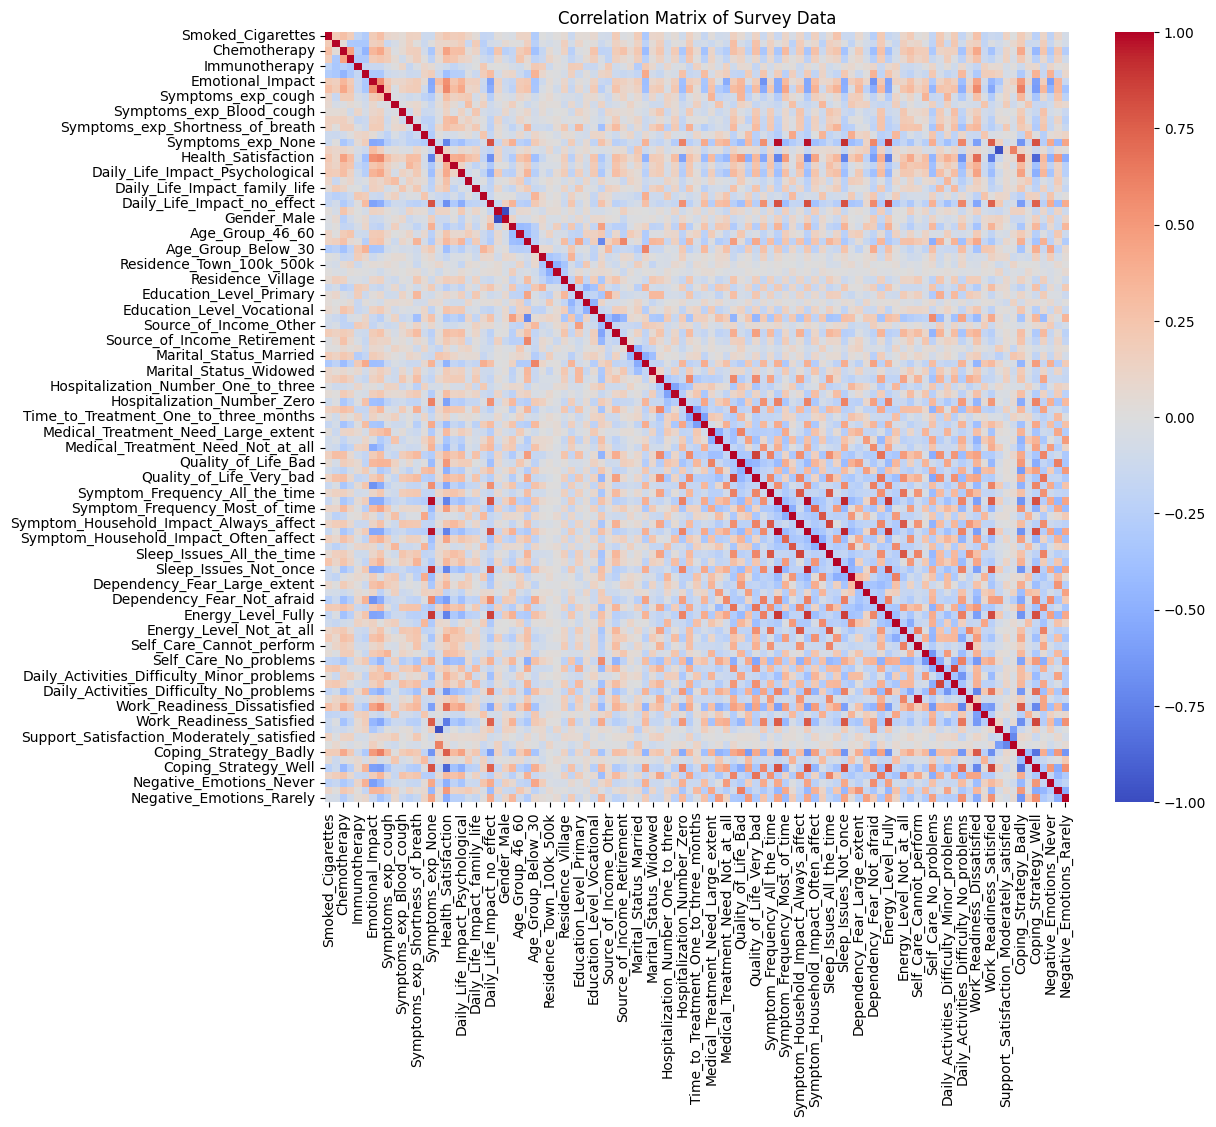

In [18]:
import pandas as pd

# Load the processed data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

# Calculate the correlation matrix
correlation_matrix = df_for_itemsets.corr()


#visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Matrix of Survey Data')
plt.show()


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, log_loss
from math import log

In [21]:
# Define predictors and target variables for each question
questions_mapping = {
    "Q1": {
        "predictors": ["Support_From_Close", "Emotional_Impact"],
        "extra_features": ["Daily_Life_Impact_physical", "Health_Satisfaction"],
        "target": "Daily_Life_Impact_social_life"
    },
    "Q2": {
        "predictors": ["Support_Satisfaction_Satisfied", "Travel_Impact"],
        "extra_features": ["Residence_Village", "Dependency_Fear_Large_extent"],
        "target": "Time_to_Treatment_Up_to_one_month"
    },
    "Q3": {
        "predictors": ["Support_From_Close", "Sleep_Issues_Rather_rarely", "Emotional_Impact"],
        "extra_features": ["Dependency_Fear_Minimally", "Health_Satisfaction"],
        "target": "Energy_Level_Mostly"
    },
    "Q4": {
        "predictors": ['Health_Satisfaction', 'Emotional_Impact', 'Quality_of_Life_Bad'],
        "extra_features": ["Daily_Activities_Difficulty_Serious_problems","Symptoms_exp_Shortness_of_breath"],
        "target": "Medical_Treatment_Need_Large_extent"
    },
    "Q5": {
        "predictors": ['Coping_Strategy_Badly','Negative_Emotions_All_the_time','Dependency_Fear_Very_large_extent'],
        "extra_features": ['Symptoms_exp_cough', 'Symptoms_exp_Hoarseness', 'Symptoms_exp_Blood_cough',
        'Symptoms_exp_chestpain','Symptoms_exp_Shortness_of_breath', 'Symptoms_exp_weakness'],
        "target": "Quality_of_Life_Very_bad"
    }

}

# Load the data
df = pd.read_csv('processed_survey_data_columns.csv')

# List of columns to exclude (not relevant for itemsets)
columns_to_exclude = ['ID', 'Year_Diagnosed']

# Drop the columns to exclude
df_for_itemsets = df.drop(columns=columns_to_exclude)

# Ensure all values are binary (1 or 0)
df_for_itemsets = df_for_itemsets.apply(lambda x: x.apply(lambda y: 1 if y != 0 else 0))

# Placeholder for results
refined_results = {}

for question, details in questions_mapping.items():
    predictors = details["predictors"]
    extra_features = details["extra_features"]
    target_col = details["target"]
    
    full_dataset = df_for_itemsets.copy()
    # Drop rows with missing values for simplicity
    subset = full_dataset.dropna(subset=[target_col] + predictors + extra_features)
    
    # Extract features (base + extra) and target
    X_base = subset[predictors]
    X_extra = subset[predictors + extra_features]
    y = subset[target_col].astype(int)  # Ensure the target is numeric
    
    # Split data into train and test sets
    X_train_base, X_test_base, y_train, y_test = train_test_split(X_base, y, test_size=0.3, random_state=42)
    X_train_extra, X_test_extra, _, _ = train_test_split(X_extra, y, test_size=0.3, random_state=42)
    
    # Train and evaluate models
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
        "RandomForest": RandomForestClassifier(random_state=42),
        "SVM": SVC(kernel='linear', probability=True, random_state=42)
    }
    
    best_model_name = None
    best_score = 0
    best_model = None
    best_feature_set = None
    aic_bic_scores = {}

    for feature_set, X_train, X_test in [("Base", X_train_base, X_test_base), ("Extra", X_train_extra, X_test_extra)]:
        for model_name, model in models.items():
            # Perform cross-validation
            scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
            mean_score = scores.mean()
            
            if mean_score > best_score:
                best_score = mean_score
                best_model_name = model_name
                best_model = model
                best_feature_set = feature_set

            # Fit the model
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            log_likelihood = -log_loss(y_test, model.predict_proba(X_test) if hasattr(model, "predict_proba") else y_pred)
            
            # Calculate AIC and BIC
            n = len(y_test)  # Number of samples
            k = X_train.shape[1]  # Number of parameters
            aic = 2 * k - 2 * log_likelihood
            bic = log(n) * k - 2 * log_likelihood
            aic_bic_scores[f"{model_name}_{feature_set}"] = {"AIC": aic, "BIC": bic}

    # Evaluate the best model
    best_model.fit(X_train_extra if best_feature_set == "Extra" else X_train_base, y_train)
    y_pred = best_model.predict(X_test_extra if best_feature_set == "Extra" else X_test_base)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    
    # Store refined results
    refined_results[question] = {
        "Best_Model": best_model_name,
        "Best_Feature_Set": best_feature_set,
        "Accuracy": best_score,
        "Confusion_Matrix": cm,
        "Classification_Report": cr,
        "AIC_BIC_Scores": aic_bic_scores
    }
 

c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\harri\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [22]:
# Display refined results
for question, results in refined_results.items():
    print(f"Question: {question}")
    print(f"Best Model: {results['Best_Model']}")
    print(f"Best Feature Set: {results['Best_Feature_Set']}")
    print(f"Accuracy: {results['Accuracy']:.2f}")
    print("Confusion Matrix:")
    print(results['Confusion_Matrix'])
    print("Classification Report:")
    print(pd.DataFrame(results['Classification_Report']).T)
    print("\n")
    print("AIC and BIC Scores:")
    print(pd.DataFrame(results['AIC_BIC_Scores']).T)
    print("\n")

Question: Q1
Best Model: LogisticRegression
Best Feature Set: Base
Accuracy: 0.92
Confusion Matrix:
[[80  0]
 [10  0]]
Classification Report:
              precision    recall  f1-score    support
0              0.888889  1.000000  0.941176  80.000000
1              0.000000  0.000000  0.000000  10.000000
accuracy       0.888889  0.888889  0.888889   0.888889
macro avg      0.444444  0.500000  0.470588  90.000000
weighted avg   0.790123  0.888889  0.836601  90.000000


AIC and BIC Scores:
                               AIC        BIC
LogisticRegression_Base   4.725592   9.725211
RandomForest_Base         4.731647   9.731266
SVM_Base                  4.712531   9.712150
LogisticRegression_Extra  8.707387  18.706626
RandomForest_Extra        8.779782  18.779020
SVM_Extra                 8.712531  18.711770


Question: Q2
Best Model: LogisticRegression
Best Feature Set: Base
Accuracy: 0.76
Confusion Matrix:
[[66  4]
 [16  4]]
Classification Report:
              precision    recall  f1-sc

Q1) How does strong 'Support_From_Close' combined with high 'Emotional_Impact' affect patients' ability to maintain their social roles?

Extra Features:

- Daily_Life_Impact_physical: Captures the physical challenges that might directly influence a patient's social roles.
- Health_Satisfaction: Indicates overall satisfaction with health, which can reflect the capacity to engage in social activities.

Q2) Given that 'Support_Satisfaction_Satisfied' and 'Travel_Impact' frequently co-occur, can we predict the probability of patients attending treatment sessions despite logistical challenges?

Extra Features:

- Residence_Village: Represents rural residence, which could add significant logistical barriers to treatment access.
- Dependency_Fear_Large_extent: Measures the psychological barrier of fearing dependency, which could influence timely treatment access.

Q3) How can we analyze the energy levels of lung cancer patients based on the presence of minimal sleep disturbances and the support they obtain from their immediate social circle?

Extra Features:

- Dependency_Fear_Minimally: Reflects patients' low fear of dependency, which may contribute to maintaining better energy levels and self-sufficiency.
- Health_Satisfaction: Indicates patients' overall satisfaction with their health, which can positively affect their energy restoration and daily vitality

Q4) How can we assess the extent of medical treatment required for lung cancer patients based on their health satisfaction, emotional distress, and poor quality of life, while considering the severity of daily activity difficulties and respiratory symptoms?

Extra Features:

- Daily_Activities_Difficulty_Serious_problems: Indicates severe challenges in performing daily tasks, which may highlight the need for extensive medical support.
- Symptoms_exp_Shortness_of_breath: Reflects respiratory difficulties, a critical symptom that could drive the need for significant medical intervention.

Q5) How can we predict the likelihood of poor health outcomes in lung cancer patients based on their emotional coping mechanisms, dependency fears, and severe respiratory symptoms, while considering the overall impact on their quality of life?

Extra Features:

- Coping_Strategy_Hard_to_say: Represents patients' uncertainty in coping with challenges, which may correlate with emotional and psychological health issues.
- Symptoms_exp_Hoarseness: Indicates vocal strain or difficulties, which could signify underlying medical complications related to respiratory health.
- Symptoms_exp_Blood_cough: Reflects a serious symptom of potential lung deterioration, necessitating immediate and extensive medical care.

 